In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
trd=pd.read_csv('/content/train_ctrUa4K.csv')
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
trd.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Checking for null values**

In [5]:
trd.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Check the data **

[Text(0, 0, '422'), Text(0, 0, '192')]

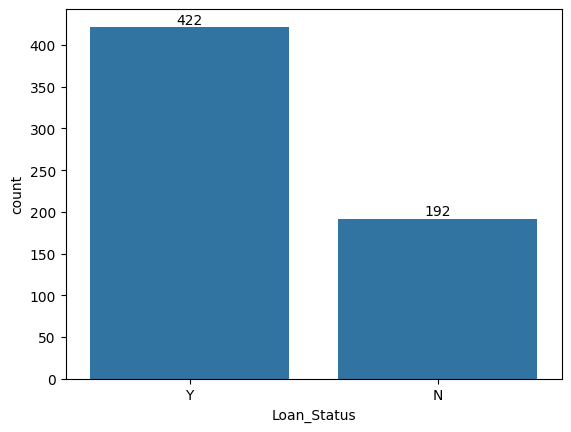

In [6]:

ax=sn.countplot(x='Loan_Status',data=trd)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Married', ylabel='Loan_Status'>

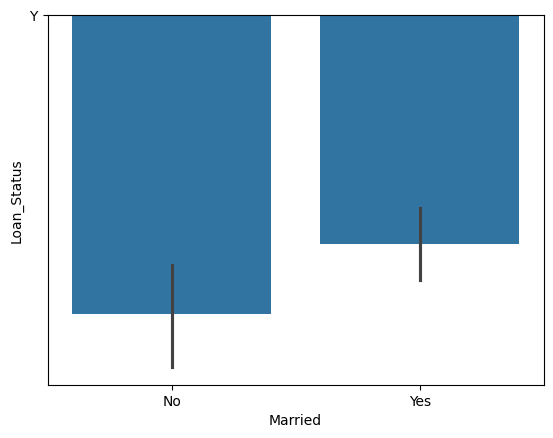

In [7]:
sn.barplot(x='Married',y='Loan_Status',data=trd)

**REmoving null values**

In [8]:
trd['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [9]:
trd['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

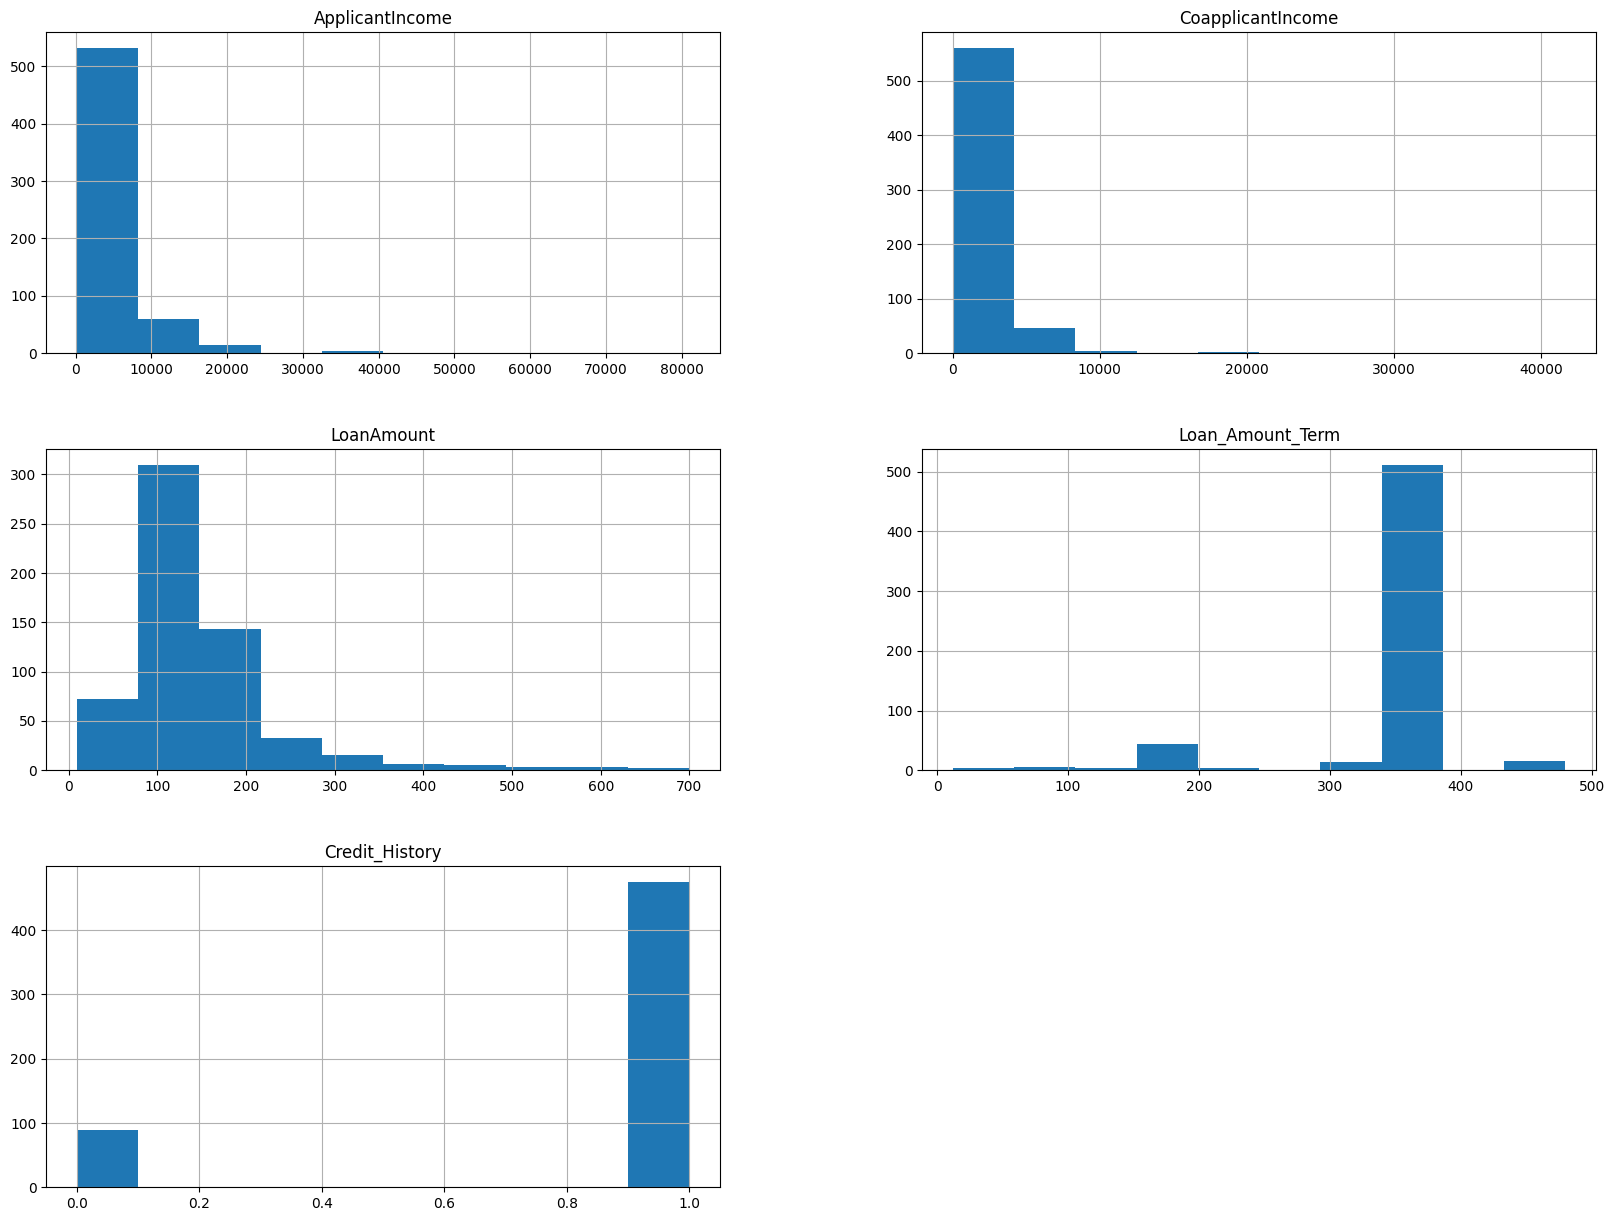

In [ ]:
fgraph=trd.select_dtypes(include=('float64','int64'))
fgraph.hist(figsize=(20,15));

**Replace na values**

In [ ]:
trd.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [2]:
trd['Gender']=trd['Gender'].fillna('Male')
trd['Loan_Amount_Term']=trd['Loan_Amount_Term'].fillna(trd['Loan_Amount_Term'].mode().iloc[0])
trd['Self_Employed']=trd['Self_Employed'].fillna(trd['Self_Employed'].mode().iloc[0])
trd['Credit_History']=trd['Credit_History'].fillna(trd['Credit_History'].mode().iloc[0])

In [3]:
trd.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
trd1=trd.copy()
trd1=trd1.drop(['Dependents'],axis=1)
trd1
#sn.barplot(x='Property_Area',y='Loan_Status',data=trd1)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [53]:
trd1=trd1.drop(['Married'],axis=1)
trd1

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
trd1.isna().sum()

Loan_ID               0
Gender                0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:

trd1['LoanAmount']=trd1['LoanAmount'].fillna(trd1['LoanAmount'].median())


In [56]:
trd1.isna().sum()

Loan_ID              0
Gender               0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
trd['Loan_Amount_Term'].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

## **`checking outlayers`**

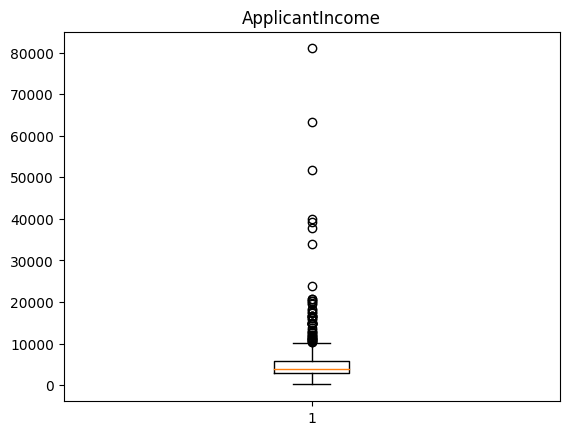

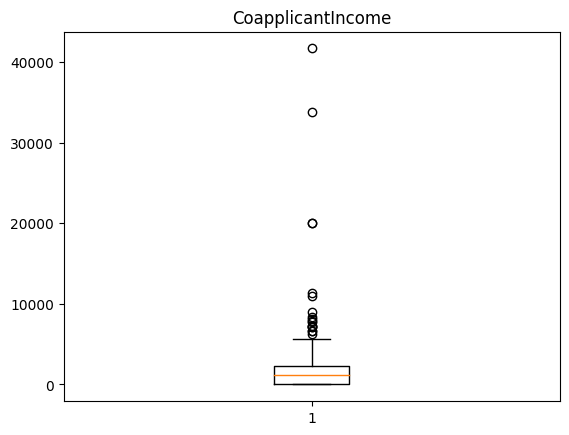

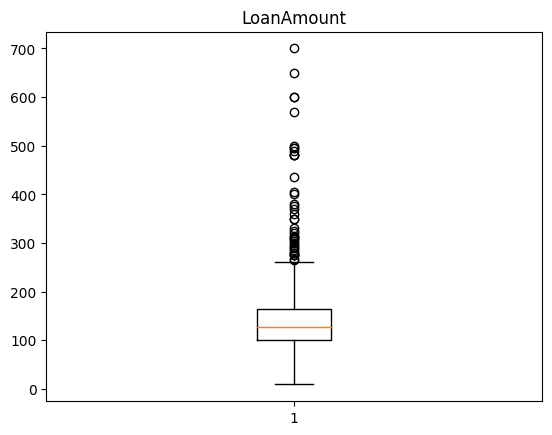

In [57]:
ls=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in ls:
  plt.figure()
  plt.boxplot(trd1[i])
  plt.title(i)




In [58]:
q1=np.percentile(trd1['ApplicantIncome'],25,method='midpoint')
q2=q1=np.percentile(trd1['ApplicantIncome'],50,method='midpoint')
q3=np.percentile(trd1['ApplicantIncome'],75,method='midpoint')

In [59]:
IQR=q3-q1
IQR

1977.5

In [60]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print("low",low_lim)
print("lupper",up_lim)

low 846.25
lupper 8756.25


In [61]:
out=[]
for x in trd1['ApplicantIncome']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out


[12841,
 9560,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 10000,
 9166,
 39999,
 9538,
 9323,
 51763,
 33846,
 39147,
 674,
 9328,
 12000,
 11000,
 10000,
 150,
 9703,
 16250,
 14683,
 11146,
 14583,
 20667,
 9508,
 20233,
 10000,
 15000,
 63337,
 9833,
 9083,
 19730,
 15759,
 9323,
 9167,
 9504,
 81000,
 14880,
 12876,
 10047,
 10416,
 37719,
 16692,
 210,
 16525,
 16667,
 10833,
 18333,
 17263,
 645,
 20833,
 13262,
 17500,
 11250,
 18165,
 10139,
 19484,
 8799,
 16666,
 9357,
 16120,
 9963,
 416,
 12000]

In [62]:
trd1['ApplicantIncome']=trd1['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)

In [63]:
out=[]
for x in trd1['ApplicantIncome']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out

[]

2nd column

In [64]:
q1=np.percentile(trd1['CoapplicantIncome'],25,method='midpoint')
q2=q1=np.percentile(trd1['CoapplicantIncome'],50,method='midpoint')
q3=np.percentile(trd1['CoapplicantIncome'],75,method='midpoint')
IQR=q3-q1
IQR
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print("low",low_lim)
print("lupper",up_lim)

low -467.5
lupper 3948.5


In [65]:
out=[]
for x in trd1['CoapplicantIncome']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out

[4196.0,
 10968.0,
 8106.0,
 5625.0,
 7210.0,
 4595.0,
 4750.0,
 4000.0,
 4167.0,
 5654.0,
 4114.0,
 8980.0,
 7750.0,
 4486.0,
 5625.0,
 5625.0,
 11300.0,
 7250.0,
 5063.0,
 4750.0,
 5296.0,
 5000.0,
 5701.0,
 4417.0,
 4333.0,
 7101.0,
 4250.0,
 4983.0,
 4490.0,
 4600.0,
 4583.0,
 6250.0,
 4167.0,
 5266.0,
 7873.0,
 4996.0,
 4232.0,
 20000.0,
 20000.0,
 4300.0,
 5064.0,
 8333.0,
 4083.0,
 4648.0,
 4416.0,
 5624.0,
 5302.0,
 4416.0,
 6667.0,
 6666.0,
 7166.0,
 5500.0,
 4266.0,
 33837.0,
 41667.0,
 4301.0]

In [66]:
trd1['CoapplicantIncome']=trd1['CoapplicantIncome'].clip(lower=low_lim,upper=up_lim)

In [67]:
out=[]
for x in trd1['CoapplicantIncome']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out

[]

In [68]:
#LoanAmount
q1=np.percentile(trd1['LoanAmount'],25,method='midpoint')
q2=q1=np.percentile(trd1['LoanAmount'],50,method='midpoint')
q3=np.percentile(trd1['LoanAmount'],75,method='midpoint')
IQR=q3-q1
IQR
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print("low",low_lim)
print("lupper",up_lim)

low 73.25
lupper 219.25


In [69]:
out=[]
for x in trd1['LoanAmount']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out

[66.0,
 267.0,
 349.0,
 70.0,
 17.0,
 315.0,
 35.0,
 320.0,
 47.0,
 44.0,
 286.0,
 258.0,
 312.0,
 265.0,
 50.0,
 25.0,
 50.0,
 225.0,
 259.0,
 44.0,
 370.0,
 650.0,
 70.0,
 25.0,
 290.0,
 242.0,
 70.0,
 30.0,
 225.0,
 244.0,
 50.0,
 600.0,
 255.0,
 275.0,
 63.0,
 700.0,
 495.0,
 67.0,
 73.0,
 260.0,
 66.0,
 58.0,
 48.0,
 55.0,
 59.0,
 240.0,
 72.0,
 60.0,
 42.0,
 280.0,
 255.0,
 279.0,
 255.0,
 304.0,
 330.0,
 30.0,
 436.0,
 54.0,
 480.0,
 56.0,
 300.0,
 376.0,
 67.0,
 71.0,
 490.0,
 70.0,
 71.0,
 46.0,
 259.0,
 228.0,
 308.0,
 67.0,
 236.0,
 570.0,
 55.0,
 380.0,
 71.0,
 296.0,
 275.0,
 71.0,
 45.0,
 65.0,
 53.0,
 66.0,
 360.0,
 62.0,
 60.0,
 239.0,
 60.0,
 405.0,
 50.0,
 55.0,
 60.0,
 70.0,
 230.0,
 234.0,
 246.0,
 500.0,
 225.0,
 243.0,
 480.0,
 40.0,
 250.0,
 70.0,
 311.0,
 45.0,
 55.0,
 480.0,
 400.0,
 324.0,
 66.0,
 26.0,
 260.0,
 600.0,
 258.0,
 70.0,
 9.0,
 275.0,
 36.0,
 61.0,
 70.0,
 56.0,
 292.0,
 260.0,
 350.0,
 496.0,
 71.0,
 40.0,
 253.0]

In [70]:
trd1['LoanAmount']=trd1['LoanAmount'].clip(lower=low_lim,upper=up_lim)

In [71]:
out=[]
for x in trd1['LoanAmount']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out

[]

**Encoding**

In [72]:
trd1.nunique()

Loan_ID              614
Gender                 2
Education              2
Self_Employed          2
ApplicantIncome      437
CoapplicantIncome    238
LoanAmount           120
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder
labl_en=LabelEncoder()
trd1['Loan_ID']=labl_en.fit_transform(trd1['Loan_ID'])
trd1['Property_Area']=labl_en.fit_transform(trd1['Property_Area'])
trd1['Gender']=labl_en.fit_transform(trd1['Gender'])

trd1['Education']=labl_en.fit_transform(trd1['Education'])

trd1['Self_Employed']=labl_en.fit_transform(trd1['Self_Employed'])

In [46]:
trd1.head(10)

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849.00,0.0,128.00,360.0,1.0,2,Y
1,1,1,0,0,4583.00,1508.0,128.00,360.0,1.0,0,N
2,2,1,0,1,3000.00,0.0,73.25,360.0,1.0,2,Y
3,3,1,1,0,2583.00,2358.0,120.00,360.0,1.0,2,Y
4,4,1,0,0,6000.00,0.0,141.00,360.0,1.0,2,Y
5,5,1,0,1,5417.00,3948.5,219.25,360.0,1.0,2,Y
6,6,1,1,0,2333.00,1516.0,95.00,360.0,1.0,2,Y
7,7,1,0,0,3036.00,2504.0,158.00,360.0,0.0,1,N
8,8,1,0,0,4006.00,1526.0,168.00,360.0,1.0,2,Y
9,9,1,0,0,8756.25,3948.5,219.25,360.0,1.0,1,N


In [74]:
trd1.tail(10)

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,604,0,0,0,8756.25,0.0,219.25,360.0,1.0,1,Y
605,605,1,1,0,2400.00,3800.0,128.00,180.0,1.0,2,N
606,606,1,0,0,3400.00,2500.0,173.00,360.0,1.0,1,Y
607,607,1,1,0,3987.00,1411.0,157.00,360.0,1.0,0,Y
608,608,1,0,0,3232.00,1950.0,108.00,360.0,1.0,0,Y
609,609,0,0,0,2900.00,0.0,73.25,360.0,1.0,0,Y
610,610,1,0,0,4106.00,0.0,73.25,180.0,1.0,0,Y
611,611,1,0,0,8072.00,240.0,219.25,360.0,1.0,2,Y
612,612,1,0,0,7583.00,0.0,187.00,360.0,1.0,2,Y
613,613,0,0,1,4583.00,0.0,133.00,360.0,0.0,1,N


In [48]:
trd1=pd.get_dummies(trd1,dtype=int)


In [77]:
trd1.head()

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_N,Loan_Status_Y
0,0,1,0,0,5849.0,0.0,128.00,360.0,1.0,2,0,1
1,1,1,0,0,4583.0,1508.0,128.00,360.0,1.0,0,1,0
2,2,1,0,1,3000.0,0.0,73.25,360.0,1.0,2,0,1
3,3,1,1,0,2583.0,2358.0,120.00,360.0,1.0,2,0,1
4,4,1,0,0,6000.0,0.0,141.00,360.0,1.0,2,0,1


In [79]:
trd2=trd1.copy()
from sklearn.preprocessing import OneHotEncoder
one_hot_en=OneHotEncoder(sparse_output=False)
trd2['Loan_Status']=one_hot_en.fit_transform(trd2[['Loan_Status']])


In [80]:
trd2.head()

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849.0,0.0,128.00,360.0,1.0,2,0.0
1,1,1,0,0,4583.0,1508.0,128.00,360.0,1.0,0,1.0
2,2,1,0,1,3000.0,0.0,73.25,360.0,1.0,2,0.0
3,3,1,1,0,2583.0,2358.0,120.00,360.0,1.0,2,0.0
4,4,1,0,0,6000.0,0.0,141.00,360.0,1.0,2,0.0


In [ ]:
trd2.set_index('Loan_ID',inplace=True)


In [49]:
trd2.head()

,Loan_ID,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,5849.0,0.0,128.00,360.0,1.0,2,0.0
1,1,1,0,0,4583.0,1508.0,128.00,360.0,1.0,0,1.0
2,2,1,0,1,3000.0,0.0,73.25,360.0,1.0,2,0.0
3,3,1,1,0,2583.0,2358.0,120.00,360.0,1.0,2,0.0
4,4,1,0,0,6000.0,0.0,141.00,360.0,1.0,2,0.0


In [49]:
trd1.shape

(614, 12)

In [50]:
trd1.columns

Index(['Loan_ID', 'Gender', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [113]:
y=trd2['Loan_Status']
X=trd2.drop(['Loan_Status'], axis=1)


Class Distribution After Random Over-sampling:
Loan_Status
0.0    422
1.0    422
Name: count, dtype: int64


In [114]:
trd3=trd2.copy

In [106]:
y

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
839    1.0
840    1.0
841    1.0
842    1.0
843    1.0
Name: Loan_Status, Length: 844, dtype: float64

# **Scaling**

In [115]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(X)
#y=scalar.fit_transform(y)
#trd2-non scaled data
#x_sc-scaled data

# **Splitting to train and test -training file**

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(491, 10) (123, 10) (491,) (123,)


In [117]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [118]:
y_test

350    0.0
377    0.0
163    0.0
609    0.0
132    0.0
      ... 
231    0.0
312    0.0
248    0.0
11     0.0
333    0.0
Name: Loan_Status, Length: 123, dtype: float64

In [119]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_predict=log_model.predict(X_test)
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [98]:
y_test

350    0.0
377    0.0
163    0.0
609    0.0
132    0.0
      ... 
231    0.0
312    0.0
248    0.0
11     0.0
333    0.0
Name: Loan_Status, Length: 123, dtype: float64

In [120]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print("Accuary score",accuracy_score(y_test,y_predict))


Accuary score 0.7886178861788617


# **Accuary score 0.7886178861788617-logistic regression**

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[79,  1],
       [25, 18]])

# **KNN algorithm**

In [102]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(1,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(X_train,y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

metric_k

[0.7317073170731707,
 0.7235772357723578,
 0.7479674796747967,
 0.7642276422764228,
 0.7723577235772358,
 0.7723577235772358,
 0.7723577235772358,
 0.7723577235772358,
 0.7642276422764228,
 0.7723577235772358,
 0.7804878048780488,
 0.7723577235772358,
 0.7804878048780488,
 0.7804878048780488]

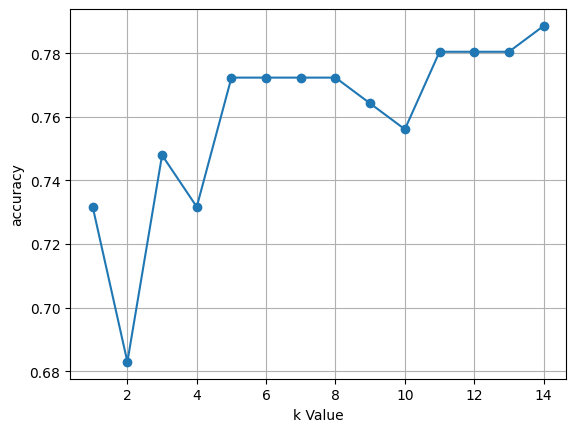

In [96]:
import matplotlib.pyplot as plt
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [97]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [98]:
print("accuarcy score",accuracy_score(y_test,y_pred_knn))

accuarcy score 0.7479674796747967


# **accuarcy score 0.7479674796747967-KNN 'euclidean'**

In [99]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
#p=2-euclidean distance
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)
print("accuarcy score",accuracy_score(y_test,y_pred_knn))

accuarcy score 0.7479674796747967


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**accuarcy score 0.7479674796747967-knn minkowski**

In [100]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=1)
#p=1 for manhattan disctance
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

print("accuarcy score",accuracy_score(y_test,y_pred_knn))

accuarcy score 0.7398373983739838


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [101]:
from sklearn.svm import SVC
svm_cl=SVC(kernel='linear')
svm_cl.fit(X_train,y_train)
y_svm_prediction=svm_cl.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction))

confusion_matrix [[18 25]
 [ 1 79]]


In [104]:
print("accuracy_score svm",accuracy_score(y_test,y_svm_prediction))

accuracy_score svm 0.7886178861788617


accuracy_score svm **0.7886178861788617**

In [106]:
from sklearn.svm import SVC
svm_cl=SVC(kernel='rbf')
svm_cl.fit(X_train,y_train)
y_svm_prediction_rbf=svm_cl.predict(X_test)
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction_rbf))
print("accuracy_score rbf-",accuracy_score(y_test,y_svm_prediction_rbf))

confusion_matrix [[18 25]
 [ 5 75]]
accuracy_score rbf- 0.7560975609756098


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
from sklearn.svm import SVC
svm_cl=SVC(kernel='poly')
svm_cl.fit(X_train,y_train)
y_svm_prediction_poly=svm_cl.predict(X_test)
print("confusion_matrix",confusion_matrix(y_test,y_svm_prediction_poly))
print("accuracy_score",accuracy_score(y_test,y_svm_prediction_poly))

confusion_matrix [[17 26]
 [ 4 76]]
accuracy_score 0.7560975609756098


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
from sklearn.tree import DecisionTreeClassifier
dsn_cl=DecisionTreeClassifier(criterion='entropy')
dsn_cl.fit(X_train,y_train)
y_dsn_prediction_poly=dsn_cl.predict(X_test)
print("confusion_matrix",confusion_matrix(y_test,y_dsn_prediction_poly))
print("accuracy_score",accuracy_score(y_test,y_dsn_prediction_poly))

confusion_matrix [[22 21]
 [17 63]]
accuracy_score 0.6910569105691057


In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc_cl=RandomForestClassifier(criterion='entropy')
rfc_cl.fit(X_train,y_train)
y_rfc_prediction=rfc_cl.predict(X_test)
print("confusion_matrix",confusion_matrix(y_test,y_rfc_prediction))
print("accuracy_score",accuracy_score(y_test,y_rfc_prediction))

<ipython-input-110-4b87afe72514>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_cl.fit(X_train,y_train)


confusion_matrix [[19 24]
 [ 7 73]]
accuracy_score 0.7479674796747967


Preprocessing on test data

In [ ]:
test=pd.read_csv('/content/test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test['Gender']=trd['Gender'].fillna('Male')
test['Dependents']=test['Dependents'].fillna(method='ffill')

In [ ]:
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode().iloc[0])


0    No
Name: Self_Employed, dtype: object


In [ ]:
test.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode().iloc[0])


In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode().iloc[0])

In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

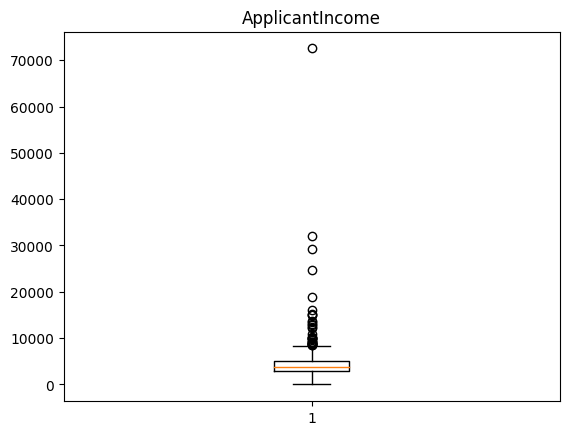

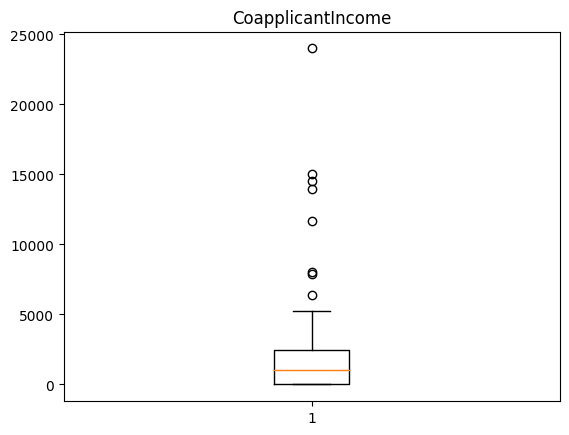

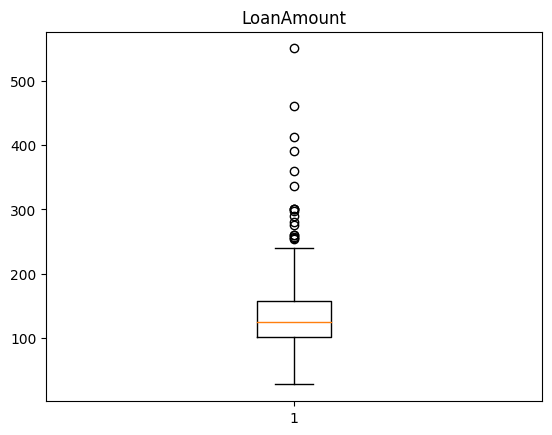

In [ ]:
ls=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in ls:
  plt.figure()
  plt.boxplot(test[i])
  plt.title(i)

***Removing outlayers from test data***

In [ ]:
q1=np.percentile(test['CoapplicantIncome'],25,method='midpoint')
q2=q1=np.percentile(test['CoapplicantIncome'],50,method='midpoint')
q3=np.percentile(test['CoapplicantIncome'],75,method='midpoint')
IQR=q3-q1
IQR
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print("low",low_lim)
print("lupper",up_lim)

low -1083.25
lupper 4538.75


In [ ]:
out=[]
for x in test['CoapplicantIncome']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out
test['CoapplicantIncome']=test['CoapplicantIncome'].clip(lower=low_lim,upper=up_lim)
out=[]
for x in test['CoapplicantIncome']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out

[]

In [ ]:
q1=np.percentile(test['ApplicantIncome'],25,method='midpoint')
q2=q1=np.percentile(test['ApplicantIncome'],50,method='midpoint')
q3=np.percentile(test['ApplicantIncome'],75,method='midpoint')
IQR=q3-q1
IQR
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print("low",low_lim)
print("lupper",up_lim)
test['ApplicantIncome']=test['ApplicantIncome'].clip(lower=low_lim,upper=up_lim)
out=[]
for x in test['ApplicantIncome']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out

low 1875.0
lupper 6971.0


[]

In [ ]:
q1=np.percentile(test['LoanAmount'],25,method='midpoint')
q2=q1=np.percentile(test['LoanAmount'],50,method='midpoint')
q3=np.percentile(test['LoanAmount'],75,method='midpoint')
IQR=q3-q1
IQR
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR
print("low",low_lim)
print("lupper",up_lim)
test['LoanAmount']=test['LoanAmount'].clip(lower=low_lim,upper=up_lim)
out=[]
for x in test['LoanAmount']:
  if(x>up_lim) or (x<low_lim):
    out.append(x)
out

low 76.25
lupper 206.25


[]

## ***Encoding***

In [ ]:
test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      256
CoapplicantIncome    178
LoanAmount            97
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labl_en=LabelEncoder()
test['Loan_ID']=labl_en.fit_transform(test['Loan_ID'])
test['Property_Area']=labl_en.fit_transform(test['Property_Area'])
test['Gender']=labl_en.fit_transform(test['Gender'])
test['Married']=labl_en.fit_transform(test['Married'])
test['Education']=labl_en.fit_transform(test['Education'])
test['Self_Employed']=labl_en.fit_transform(test['Self_Employed'])
test['Self_Employed']=labl_en.fit_transform(test['Self_Employed'])




In [ ]:
test1=test.drop(['Dependents'],axis=1)

In [ ]:
test1.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,
0,1,1,0,0,5720,0.0,110.00,360.0,1.0,2
1,1,1,0,0,3076,1500.0,126.00,360.0,1.0,2
2,1,1,0,0,5000,1800.0,206.25,360.0,1.0,2
3,1,1,0,0,2340,2546.0,100.00,360.0,1.0,2
4,1,0,1,0,3276,0.0,78.00,360.0,1.0,2
5,1,1,1,1,2165,3422.0,152.00,360.0,1.0,2
6,1,0,1,0,2226,0.0,76.25,360.0,1.0,1
7,1,1,1,0,3881,0.0,147.00,360.0,0.0,0
8,1,1,0,0,6971,0.0,206.25,240.0,1.0,2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(test1)
X_sc=pd.DataFrame(X_sc)
X_sc.head()

,0,1,2,3,4,5,6,7,8,9
0,0.472582,0.758358,-0.544812,-0.334845,1.004172,-0.925840,-0.548600,0.266022,0.437674,1.118764
1,0.472582,0.758358,-0.544812,-0.334845,-0.647361,0.078173,-0.140650,0.266022,0.437674,1.118764
2,0.472582,0.758358,-0.544812,-0.334845,0.554435,0.278976,1.905475,0.266022,0.437674,1.118764
3,0.472582,0.758358,-0.544812,-0.334845,-1.107092,0.778305,-0.803569,0.266022,0.437674,1.118764
4,0.472582,-1.318638,1.835497,-0.334845,-0.522434,-0.925840,-1.364500,0.266022,0.437674,1.118764


<Axes: >

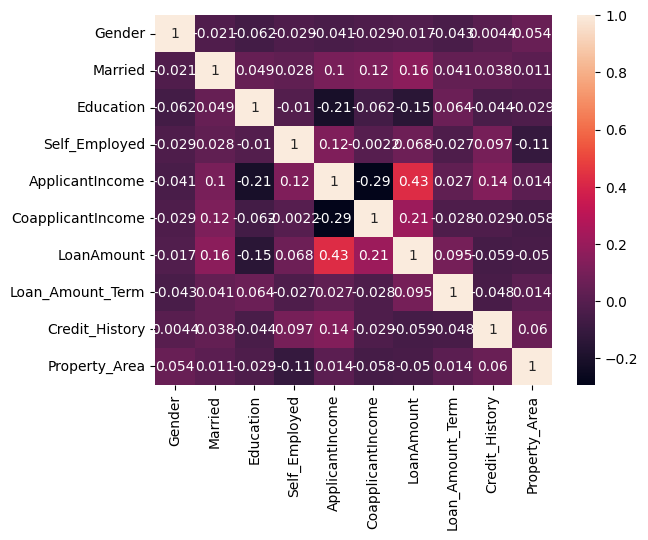

# **Modeling**

training data-x_sc
test data=X_sc

In [1]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_predict=log_model.predict(X_test)
y_predict


NameError: name 'X_train' is not defined